<a href="https://colab.research.google.com/github/vaibhavm291/DESIGN-AND-DEVELOPMENT-OF-HYBRID-MODEL-FOR-EFFICIENT-PREDICTION-OF-STOCK-PRICES/blob/main/LR%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")


/tmp/ipython-input-2-2331544468.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [3]:
data = data[["Close"]]


In [4]:
data["Target"] = data["Close"].shift(-1)


In [5]:
data.dropna(inplace=True)


In [6]:
X = data[["Close"]]  # today’s price
y = data["Target"]   # tomorrow’s price


In [7]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [10]:
latest_close = data.iloc[-1]["Close"]
tomorrow_price = model.predict([[latest_close.item()]])

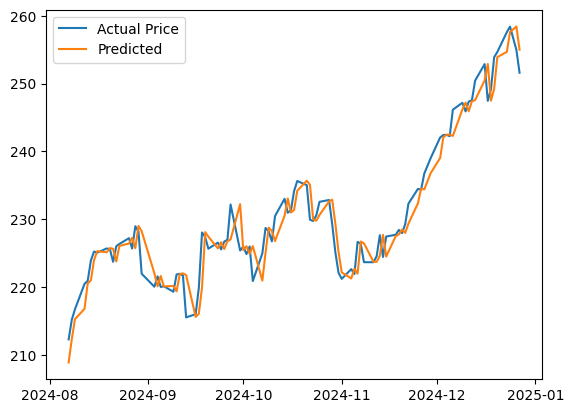

In [12]:
recent_data = data.tail(100)
recent_X = recent_data[["Close"]]
recent_y = recent_data["Target"]
recent_preds = model.predict(recent_X)
plt.plot(recent_data.index, recent_y, label="Actual Price")
plt.plot(recent_data.index, recent_preds, label="Predicted")
plt.legend()
plt.show()


In [16]:
from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')

data = yf.download(ticker, start="2020-01-01", end=today)

# Recreate the 'Target' column after re-downloading the data
data["Target"] = data["Close"].shift(-1)

# Drop the last row as it will have a NaN in the 'Target' column
data.dropna(inplace=True)

/tmp/ipython-input-16-3350773146.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end=today)
[*********************100%***********************]  1 of 1 completed


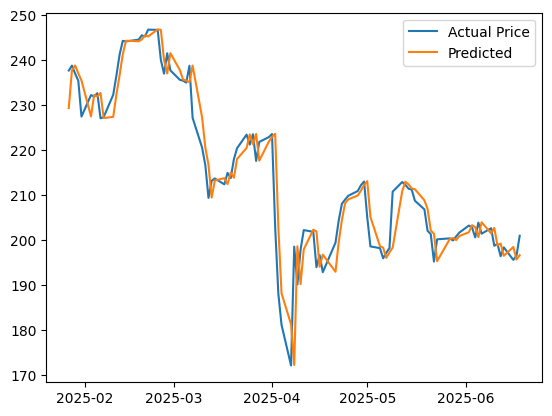

In [17]:
recent_data = data.tail(100)
recent_X = recent_data[["Close"]]
recent_y = recent_data["Target"]
recent_preds = model.predict(recent_X)
plt.plot(recent_data.index, recent_y, label="Actual Price")
plt.plot(recent_data.index, recent_preds, label="Predicted")
plt.legend()
plt.show()